In [23]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare
import pandas as pd

# Exploratory Analysis

Purpose of EDA: 
- Discover features that are driving the outcome (target). 
- Learn the vast majority of our takeaways and interesting stories from the data
- Discover if we need to drop features, if we need to handle missing values, or if there's value to combining features

Steps EDA: 
- Split the Data 
- Hypothesize: Form and document you initial hypothesis about how the predictors interact with the target. 
- Visualize: Use visualization techniques to identify drivers. 
- Test your hypothesis when visualization isn't immediately clear. Use the appropriate statistical tests (t-tests, correlation, chi-square)

In [40]:
df = acquire.get_titanic_data()
df.head(3)

Using cached csv


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1


In [41]:
#Prepare Data 
titanic_df = prepare.prep_titanic_data(df)

In [42]:
train, validate, test = titanic_df

In [43]:
train.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embark_town', 'alone', 'sex_male', 'embark_town_Queenstown',
       'embark_town_Southampton'],
      dtype='object')

In [44]:
#drop passenger_id
cols_to_drop = ['passenger_id']
train = train.drop(columns=cols_to_drop)

In [45]:
#confirm drop 
train.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embark_town', 'alone', 'sex_male', 'embark_town_Queenstown',
       'embark_town_Southampton'],
      dtype='object')

A good first step is to run .value_counts, calculate proportions, or visualize a histogram of the target

In [46]:
#Only 38% of the passengers survived 
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

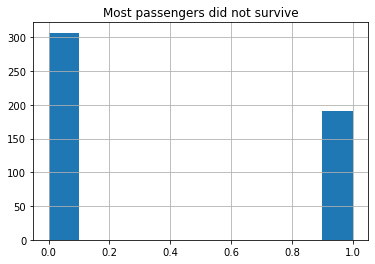

In [47]:
plt.title("Most passengers did not survive")
train.survived.hist()
plt.show()

Because approximately 62% perished and 38% survived, predicting 'not survived' will be our baseline prediction to test the usefulness of features.

### Explore with Decision Tree

In [27]:
#Drop sex and embark down
#cols_to_drop = ['sex', 'embark_town']
#train = train.drop(columns=cols_to_drop)

In [28]:
#split the features from the target variable for train, validate, test
#X_train = train.drop(columns=['survived'])
#y_train = train.survived 

#X_validate = validate.drop(columns=['survived'])
#y_validate = validate.survived

#X_test = test.drop(columns=['survived'])
#y_test = test.survived

In [29]:
#Train Model: Create the Object 
#Create the decision tree object with desired hyper-parameters 
#clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [30]:
#Fit the Model 
#Fit the random forest algorithm to the traning data 
#clf = clf.fit(X_train, y_train)

In [31]:
#make a prediction on train observations 
#y_pred = clf.predict(X_train)

In [32]:
#estimate the probability 
#y_pred_proba = clf.predict_proba(X_train)

In [34]:
## Feature importance in descending order
#X_train.columns[clf.feature_importances_.argsort()[::-1]]

Index(['sex_male', 'pclass', 'fare', 'age', 'embark_town_Southampton',
       'embark_town_Queenstown', 'alone', 'parch', 'sibsp'],
      dtype='object')

Exploration Questions 
- Are you more likely to survive if you are female? 
- Are you more likely to survive if you are in first class? 
- Are you more likely to survive if you paid a higher price for your fare? 
- Are you more likely to survive if you are under 12 years old? 

In [49]:
train.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embark_town', 'alone', 'sex_male', 'embark_town_Queenstown',
       'embark_town_Southampton'],
      dtype='object')

Gender

In [50]:
pd.crosstab(train.sex, train.survived, normalize="index")

survived,0,1
sex,,
female,0.240000,0.760000
male,0.820433,0.179567


<AxesSubplot:xlabel='sex'>

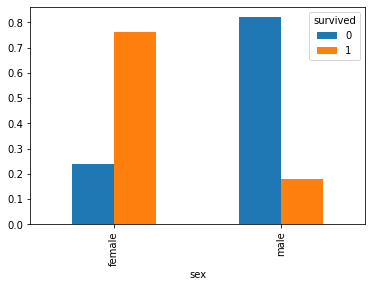

In [52]:
pd.crosstab(train.sex, train.survived, normalize="index").plot.bar()

Takeaways 
- 76% of females survived 
- 82% of males did not survive

Class 

In [53]:
pd.crosstab(train.pclass, train.survived, normalize="index")

survived,0,1
pclass,,
1,0.393162,0.606838
2,0.500000,0.500000
3,0.762082,0.237918


<AxesSubplot:xlabel='pclass'>

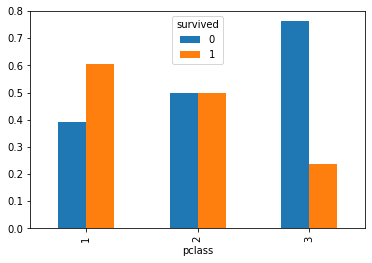

In [54]:
pd.crosstab(train.pclass, train.survived, normalize="index").plot.bar()

Takeaways: 
- 60% of people in first class survived 
- 50% of people in second class survived 
- 24% of people in third class survived

### Survival by Gender and Class 

### First Class 

In [103]:
bool_mask = (train['pclass'] == 1)
bool_mask2 = (train['sex'] == 'female')
combined_mask = bool_mask & bool_mask2
female_first_class = train[combined_mask]
female_first_class.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,female_first
306,1,1,female,29.678105,0,0,110.8833,Cherbourg,1,0,0,0,False
504,1,1,female,16.000000,0,0,86.5000,Southampton,1,0,0,1,False


In [84]:
female_first_class.value_counts().sum()

48

In [85]:
survived_mask = (train['survived'] == 1)

In [86]:
female_first_class[survived_mask].value_counts().sum()

46

### 95.8% of females in first class survived 

In [102]:
male_mask = (train['sex'] == 'male')
combined_mask2 = male_mask & bool_mask
male_first_class = train[combined_mask2]
male_first_class.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,female_first
583,0,1,male,36.0,0,0,40.125,Cherbourg,1,1,0,0,False
694,0,1,male,60.0,0,0,26.550,Southampton,1,1,0,1,False


In [95]:
male_first_class.value_counts().sum()

69

In [98]:
male_first_class[survived_mask].value_counts().sum()

25

### 36.2% of males in first class survived

### Second Class

In [101]:
second_class_mask = (train['pclass'] == 2)
bool_mask2 = (train['sex'] == 'female')
combo_mask = second_class_mask & bool_mask2
female_second_class = train[combo_mask]
female_second_class.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,female_first
259,1,2,female,50.0,0,1,26.0,Southampton,0,0,0,1,False
272,1,2,female,41.0,0,1,19.5,Southampton,0,0,0,1,False


In [105]:
female_second_class.value_counts().sum()

46

In [106]:
female_second_class[survived_mask].value_counts().sum()

44

### 95.6% of females in second class survived 

In [107]:
male_mask = (train['sex'] == 'male')
combined_mask5 = male_mask & second_class_mask
male_second_class = train[combined_mask5]
male_second_class.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,female_first
308,0,2,male,30.0,1,0,24.00,Cherbourg,0,1,0,0,False
314,0,2,male,43.0,1,1,26.25,Southampton,0,1,0,1,False


In [109]:
male_second_class.value_counts().sum()

66

In [110]:
male_second_class[survived_mask].value_counts().sum()

12

### 18.1% of males in second class survived

### Third Class 

In [111]:
third_class_mask = (train['pclass'] == 3)
bool_mask2 = (train['sex'] == 'female')
combo_mask2 = third_class_mask & bool_mask2
female_third_class = train[combo_mask2]
female_third_class.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,female_first
180,0,3,female,29.678105,8,2,69.5500,Southampton,0,0,0,1,False
254,0,3,female,41.000000,0,2,20.2125,Southampton,0,0,0,1,False


In [112]:
female_third_class.value_counts().sum()

81

In [113]:
female_third_class[survived_mask].value_counts().sum()

43

### 53% of women in third class survived

In [114]:
male_mask = (train['sex'] == 'male')
combined_mask8 = male_mask & third_class_mask
male_third_class = train[combined_mask8]
male_third_class.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,female_first
165,1,3,male,9.0,0,2,20.5250,Southampton,0,1,0,1,False
50,0,3,male,7.0,4,1,39.6875,Southampton,0,1,0,1,False


In [115]:
male_third_class.value_counts().sum()

188

In [116]:
male_third_class[survived_mask].value_counts().sum()

21

### 11.1% of males in third class survived

### Fare

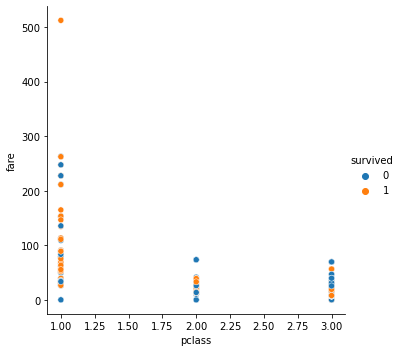

In [119]:
sns.relplot(x='pclass', y='fare', hue='survived', data=train)

### While it is true the higher the fare the more likely you are to survive, it is redundant given our takeaways from survival based on 'class'

### Children

In [126]:
child_mask = (train['age'] < 13)
all_children = train[child_mask]
all_children

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,female_first,children
165,1,3,male,9.00,0,2,20.5250,Southampton,0,1,0,1,False,True
50,0,3,male,7.00,4,1,39.6875,Southampton,0,1,0,1,False,True
535,1,2,female,7.00,0,2,26.2500,Southampton,0,0,0,1,False,True
147,0,3,female,9.00,2,2,34.3750,Southampton,0,0,0,1,False,True
448,1,3,female,5.00,2,1,19.2583,Cherbourg,0,0,0,0,False,True
16,0,3,male,2.00,4,1,29.1250,Queenstown,0,1,1,0,False,True
261,1,3,male,3.00,4,2,31.3875,Southampton,0,1,0,1,False,True
184,1,3,female,4.00,0,2,22.0250,Southampton,0,0,0,1,False,True
172,1,3,female,1.00,1,1,11.1333,Southampton,0,0,0,1,False,True
297,0,1,female,2.00,1,2,151.5500,Southampton,0,0,0,1,False,True


In [127]:
all_children.value_counts().sum()

35

In [128]:
all_children[survived_mask].value_counts().sum()

19

### Only 54% of children survived 

Takeaways: 
- Females survived at a much higher rate than males 
- While males in first and second class survived at a higher rate than males in third class, not many survived (probably because it was dishonorable (women and children first))
- Children barely survived at a rate greater than women in third class, given the age of the children (many under five) they may not have wanted to be separated from their mothers